# **Семинар 6. Описательные статистики. Пропуски и выбросы.**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

Анализируем датасет с информацией об атлетах участвовавших в Олимпийских играх (**olymp.csv**)

Данные содержат следующие признаки:
- **`ID`** - уникальный номер спортсмена
- **`Name`** - имя атлета
- **`Sex`** - пол (мужской - M,  женский - F)
- **`Age`** - возраст атлета
- **`Height`** - рост (в см)
- **`Weight`** - вес (в кг)
- **`Team`** - cтрана
- **`NOC`** - код страны от Олимпийского комитета (3 буквы)
- **`Games`** - год и сезон Олимпийских игр
- **`Year`** - год Олимпийских игр
- **`Season`** - сезон (Зимние - Winter,  Лето - Summer)
- **`City`** - город проведения Олимпийских игр
- **`Sport`** - спортивная дисциплина
- **`Event`** - категория спортивной дисциплины
- **`Medal`** - достоинство медали (Золото - Gold, Серебро - Silver, Бронза - Bronze, Без медали - NaN)


In [51]:
import pandas as pd
olmp = pd.read_csv('../../data/olymp.csv')

# Задание 1

Какие меры центральной тенденции и вариативности лучше подходят для оценки представленных признаков? 

| Признак | Описание | Кодировка | МЦТ | Мера разброса |
| ------- | -------- | --------- | --- | ------------- | 
| **Name** | имя атлета | - | ? | ? |
| **Sex** | пол | мужской (M), женский (F) | ? | ? |
| **Sex** | пол | мужской (0), женский (1) | ? | ? |
| **Height** | рост | см | ? | ? |
| **Medal** | достоиноство медали | Золото (Gold), Серебро (Silver), Бронза (Bronze), Без медали (NaN) | ? | ? |
| **Medal** | достоиноство медали | Золото (3), Серебро (2), Бронза (1), Без медали (0) | ? | ? |

Варианты МЦТ:
- Среднее
- Мода
- Медиана
- Среднее, мода
- Медиана, мода
- Среднее, медиана, мода

Варианты мер разброса:
- Количество уникальных значений
- Дисперсия, Размах, Интерквартильное расстояние

**Решение**
| Тип переменной | МЦТ | Мера разброса |
| -------------- | --- | ------------- | 
| Числовая | Среднее, медиана, мода | Дисперсия, размах, интерквартильный размах |
| Категориальная | Мода | Количество уникальных значений |
| Бинарная | Мода и Среднее* | Количество уникальных значений |

*Среднее можно рассчитать для бинарных переменных, если они закодированы 0 и 1.

**Ответ**
| Признак | Описание | Кодировка | МЦТ | Мера разброса |
| ------- | -------- | --------- | --- | ------------- | 
| **Name** | имя атлета | - | <font color=green>Мода</font> | <font color=green>Количество уникальных значений</font> |
| **Sex** | пол | мужской (M), женский (F) | <font color=green>Мода | <font color=green>Количество уникальных значений</font> |
| **Sex** | пол | мужской (0), женский (1) | <font color=green>Среднее, мода | <font color=green>Количество уникальных значений</font> |
| **Height** | рост | см | <font color=green>Среднее, медиана, мода | <font color=green>Размах, интерквартильный размах, размах</font> |
| **Medal** | достоинство медали | Золото (Gold), Серебро (Silver), Бронза (Bronze), Без медали (NaN) | <font color=green>Мода</font> | <font color=green>Количество уникальных значений</font> |
| **Medal** | достоинство медали | Золото (3), Серебро (2), Бронза (1), Без медали (0) | <font color=green>Мода</font> | <font color=green>Количество уникальных значений</font> |


# Задание 2
Постройте гистограммы для роста (**Height**) и веса (**Weight**) атлетов. Отметьте верные утверждения:

- В даных скорее всего есть атлеты, чей вес (Weight) экстремально большой
- В даных скорее всего есть атлеты, чей вес (Weight) экстремально низкий
- Среднее и медиана для роста (Height) практически совпадают
- Распределение роста (Height) атлетов похоже на нормальное

Распределение роста:

<Axes: ylabel='Frequency'>

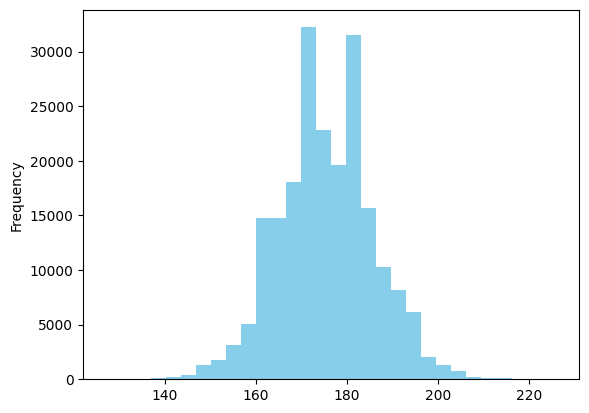

In [52]:
olmp['Height'].plot(kind = 'hist', color = 'skyblue', bins = 30)

- Распределение роста похоже на симметричное унимодальное распределение, для которого хакатерно равенство **медиана = мода = среднее**. Так как у нас не идеализированное, а реальное распределение, то это верно только приблизительно (медиана $\approx$ мода $\approx$ среднее) 
- Такое "колокообразное" распределение с называют **нормальным** распределением. При нормальном распределении большинство значений сосредоточено около среднего, а при удалении от среднего количество наблюдений уменьшается

Распределение веса:

<Axes: ylabel='Frequency'>

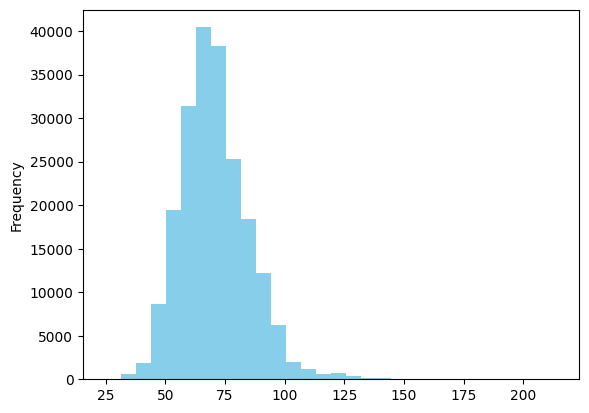

In [53]:
olmp['Weight'].plot(kind = 'hist', color = 'skyblue', bins = 30)

- Распределение веса асимметрично - **смещено вправо** (существует правый **хвост** распределения)
- Это означает, что существуют **экстремально высокие** значения веса. На гистограмме они видны как маленькие столбцы справа (вес > 125)

Таким образом, ответ:

- <font color=green>В даных скорее всего есть атлеты, чей вес (Weight) экстремально большой</font>
- <font color=red>В даных скорее всего есть атлеты, чей вес (Weight) экстремально низкий</font>
- <font color=green>Среднее и медиана для роста (Height) практически совпадают</font>
- <font color=green>Распределение роста (Height) атлетов похоже на нормальное</font>

# Задание 3
На рисунке представлена гистограмма распределения роста атлетов (**Height**)

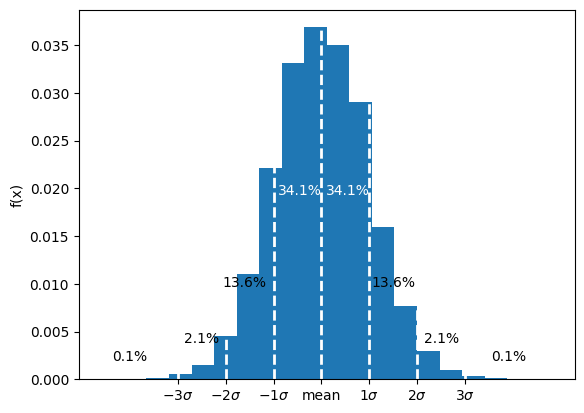

Выберите все верные утверждения:
- Рост 68.2% атлетов находится в диапазоне от 164.82 до 185.86 см.
- 15,7% атлетов имеют рост от 185.86 до 206.98 см
- Рост до 185.86 см имеют 84.1% атлетов
- Средний рост атлетов равен 175.34

**Решение:**

In [54]:
# рассчитываем mean() +- std()
olmp['Height'].mean() - olmp['Height'].std(), olmp['Height'].mean() + olmp['Height'].std()

(np.float64(164.82050765098452), np.float64(185.857432096343))

In [55]:
# Какому росту соответствует mean+std() и mean() + 3*std()?
olmp['Height'].mean() + olmp['Height'].std(), olmp['Height'].mean() + 3 * olmp['Height'].std()

(np.float64(185.857432096343), np.float64(206.89435654170143))

In [56]:
# Какой % атлетов имеют рост до 185.86 см?
sum(olmp['Height'] < 185.86) / len(olmp) * 100

65.35763289514452

In [57]:
# Какой средний рост атлетов?
olmp['Height'].mean()

np.float64(175.33896987366376)

- <font color=green>Рост 68.2% атлетов находится в диапазоне от 164.82 до 185.86 см</font>
- <font color=red>15,7% атлетов имеют рост от 185.86 до 206.98 см</font>
- <font color=red>Рост до 185.86 см имеют 84.1% атлетов</font>
- <font color=green>Средний рост атлетов равен 175.34</font>

# Задание 4
Узнайте в каком году наибольшее количество "атлетов" приняло участие в соревнованиях (**Sport**) по искусству (**Art Competitions**)

**Решение**
1. Найдите только строчки, соответсвующие конкурсу (**Sport**) искусств (**Art Competitions**)
2. В отфильтрованных данных удалите повторяющихся атлетов с помощью метода `.drop_duplicates("ID")`
3. Найдите моду по признаку Year

In [58]:
olmp[olmp['Sport'] == 'Art Competitions'].drop_duplicates('ID')['Year'].mode()

0    1932
Name: Year, dtype: int64

**Ответ**: 1932

# Задание 5

Добавьте в таблицу новый признак **AC**, который будет представлять собой кодированные значения переменной **Sport**. Кодировку проведите следующим образом: если значение **Sport** равно **Art Competitions** – то перенесите значение как есть, в противном случае – **Other**. В ответ впишите, сколько строк датафрейма входят в категорию **Other**.

*Чтобы узнать ответ, можно построить частотную таблицу по новому признаку AC*

In [59]:
olmp['AC'] = olmp['Sport'].apply(lambda x: x if x == 'Art Competitions' else 'Other')
olmp['AC'].value_counts()

AC
Other               267538
Art Competitions      3578
Name: count, dtype: int64

**Ответ:** 267538

# Задание 6
Создайте сводную таблицу по Олимпиаде в которой приняло участие больше всего атлетов в конкурсе искусств: в рядах должны быть уникальные категории по признаку **AC**, в колонках среднее, медиана и стандартное отклонение по возрасту **Age**

In [60]:
# Определяем год, в который приняло участие больше всего атлетов в конкурсе искусств (Art Competitions)
olmp[olmp['AC'] == 'Art Competitions']['Year'].value_counts()

Year
1932    1124
1936     813
1928     808
1948     471
1924     318
1912      33
1920      11
Name: count, dtype: int64

In [61]:
# Создание сводной таблицы по AC
olmp[olmp['Year']==1932].groupby('AC')['Age'].agg(['mean', 'std', 'median'])

,mean,std,median
AC,,,
Art Competitions,46.937931,13.278205,47.0
Other,25.207996,6.106876,24.0


In [62]:
# Более легкий способ получить статистики
olmp[olmp['Year']==1932].groupby('AC')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
AC,,,,,,,,
Art Competitions,1015.0,46.937931,13.278205,14.0,38.0,47.0,56.0,96.0
Other,1976.0,25.207996,6.106876,11.0,21.0,24.0,27.0,54.0


# Задание 7
По созданной сводной таблице изучите описательные статистики и выберите все верные утверждения:

- Вариативность возраста выше среди атлетов выступающих в конкурсе искусств (Art Competitions)
- В среднем возраст атлетов выступающих в конкурсе искусств (Art Competitions) и других соревнованиях (Other) не отличается
- В данных точно есть атлет НЕ участвовавший в конкурсе искусств, чей возраст равен 24
- В категории Other есть атлет чей возраст аномально низкий
- В категории Art Competitions есть атлет чей возраст аномально высокий

**Решение**
- <font color=green>Вариативность возраста выше среди атлетов выступающих в конкурсе искусств (Art Competitions)</font> - верно, так как стандартное отклонение (`std`) у студентов, выступающих в конкурсе искусств = 13.28, в то время как стандартное отклонение у других атлетов = 6.11
- <font color=red>В среднем возраст атлетов выступающих в конкурсе искусств (Art Competitions) и других соревнованиях (Other) не отличается</font> - средний (`mean`) возраст атлетов, выступающих в конкурсе искусств (46.94) почти в два раза больше возраста других атлетов (25.21)
- <font color=red>В данных точно есть атлет НЕ участвовавший в конкурсе искусств, чей возраст равен 24</font> - вообще ничего не можем сказать про атлета с 24 годами
- <font color=red>В категории Other есть атлет чей возраст аномально низкий</font> - нет, так как среднее $\approx$ медиана
- <font color=red>В категории Art Competitions есть атлет чей возраст аномально высокий</font> - нет, так как среднее $\approx$ медиана

# Задание 8
Посчитайте следующие описательные статистики:
1. Какой атлет (**Name**) завоевал больше всего золотых (**Gold**) медалей (**Medal**)?
2. Среднеквадратичное отклонение возраста (**Age**) атлетов, соревнующихся в **Boxing**?
3. В каком городе (**City**) прошла первая (**Year**) зимняя (**Winter**) Олимпиада?
4. В каком количестве стран (**NOC**) межкварительный диапазон роста атлетов равен 8?
    - Найдите 3 квартиль роста для каждой страны (сохраните в переменную)
    - Найдите 1 квартиль роста для каждой страны (сохраните в переменную)
    - Вычтите переменную с данными по 1 квартилю из переменной с данными по 3 квартилю (сохраните в переменную)
    - Преобразуйте **Series** в **DataFrame** c помощью метода `.to_frame()`
    - Постройте частотную таблицу по столбцу **Height** и найдите количество стран, чей межкварительный диапазон роста атлетов равен 8

**Решение:**

In [63]:
# 1. Какой атлет (Name) завоевал больше всего золотых (Gold) медалей (Medal)
olmp[olmp['Medal'] == 'Gold']['Name'].value_counts().iloc[:1]

Name
Michael Fred Phelps, II    23
Name: count, dtype: int64

In [64]:
# 2. Среднеквадратичное отклонение возраста (Age) атлетов, соревнующихся в Boxing
olmp[olmp['Sport'] == 'Boxing']['Age'].std().round(2)

np.float64(3.44)

In [65]:
# 3. В каком городе (City) прошла первая (Year) зимняя (Winter) Олимпиада?
olmp[olmp['Season'] == 'Winter'].sort_values('Year')['City'].iloc[:1]

13539    Chamonix
Name: City, dtype: object

In [66]:
# 4. В каком количестве стран (NOC) межкварительный диапазон роста атлетов равен 8?
# 4.1 Найдите 3 квартиль роста для каждой страны (сохраните в переменную)
noc_3q = olmp.groupby('NOC')['Height'].quantile(0.75)

## 4.2 Найдите 1 квартиль роста для каждой страны (сохраните в переменную)
noc_1q = olmp.groupby('NOC')['Height'].quantile(0.25)

## 4.3 Вычтите переменную с данными по 1 квартилю из переменной с данными по 3 квартилю (сохраните в переменную)
noc_iqr = noc_3q - noc_1q

## 4.4 Преобразуйте Series в DataFrame c помощью метода .to_frame()
noc_iqr = noc_iqr.to_frame()

## 4.5 Постройте частотную таблицу по столбцу Height и найдите количество стран, чей межкварительный диапазон роста атлетов равен 8
sum(noc_iqr['Height'] == 8)

11

# Задание 9
Посчитайте следующие описательные статистики.
- Дисперсию переменной Weight. Ответы округлите до сотых
- Размах переменной Year 
- Медиану переменной Age 
- Межквартильное расстояние переменной Height

In [67]:
# Дисперсию переменной Weight
olmp['Weight'].var().round(2)

np.float64(205.87)

In [68]:
# Размах переменной Year 
olmp['Year'].max() - olmp['Year'].min()

np.int64(120)

In [69]:
# Медиану переменной Age 
olmp['Age'].median()

np.float64(24.0)

In [70]:
# Межквартильное расстояние переменной Height 
olmp['Height'].quantile(0.75) - olmp['Height'].quantile(0.25)

np.float64(15.0)